# Faris Abufarha
# 1200546

In [1]:
! pip install -U scikit-learn

Defaulting to user installation because normal site-packages is not writeable


In [2]:
!python3 -m pip show scikit-learn # to see which version and wherescikit-learn is installed
!python3 -m pip freeze # to see all packages installed in the active virtualenv
!python3 -c "import sklearn; sklearn.show_versions()"

Name: scikit-learn
Version: 1.5.1
Summary: A set of python modules for machine learning and data mining
Home-page: https://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: /home/faris/.local/lib/python3.10/site-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: feature-engine, imbalanced-learn, lazypredict
aiohttp==3.8.1
aiosignal==1.2.0
alabaster==0.7.12
anyio==4.0.0
appdirs==1.4.4
apturl==0.5.2
argon2-cffi==23.1.0
argon2-cffi-bindings==21.2.0
arrow==1.2.3
astroid==2.9.3
asttokens==2.4.0
async-lru==2.0.4
async-timeout==4.0.1
atomicwrites==1.4.0
attrs==23.1.0
autopep8==1.6.0
Babel==2.12.1
backcall==0.2.0
bcrypt==3.2.0
beautifulsoup4==4.12.2
beniget==0.4.1
black==21.10b0
bleach==6.0.0
blinker==1.4
Brlapi==0.8.3
Brotli==1.0.9
certifi==2020.6.20
cffi==1.15.1
chardet==4.0.0
charset-normalizer==3.2.0
chrome-gnome-shell==0.0.0
click==8.0.3
cloudpickle==2.0.0
colorama==0.4.4
comm==0.1.4
command-not-found==0.3
contourpy==1.1.1
cryptography==3.4.8
cupshelpers

# 1.1 Regression
Regression is a statistical technique that relates a continuous dependent variable to
one or more independent variables. In this part, we will fit different regression models
on a toy dataset.

## 1.1.1 Generating examples
We will start by generating a toy dataset. Generate 40 examples using the following
function
f (x) = sin(x) + ϵ,
where ϵ is sampled from a normal distribution with standard deviation 0.1, and
x ∈ [0, 1). Split the samples to into two equal sets: training set, and testing set.

In [3]:
import numpy as np


def true_fun(X):
    return np.sin(1.5 * np.pi * X)


In [4]:
np.random.seed(0)
n_samples = 40
X = np.random.rand(n_samples)

X_train = np.sort(X[:n_samples // 2])
y_train = true_fun(X_train) + np.random.randn(n_samples // 2) * 0.1

X_test = np.sort(X[n_samples // 2:])
y_test = true_fun(X_test) + np.random.randn(n_samples // 2) * 0.1

Plot both the training and testing examples in a scatter plot and show the true
function curve for the range [0, 1).

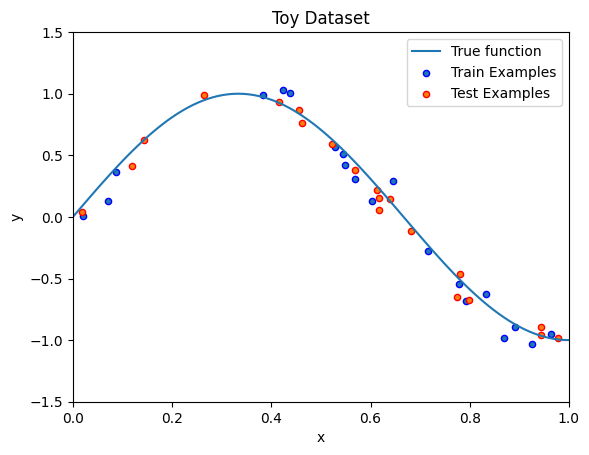

In [5]:
import matplotlib.pyplot as plt

x = np.linspace(0, 1, 100)
plt.plot(x, true_fun(x), label="True function")
plt.scatter(X_train, y_train, edgecolor="b", s=20, label="Train Examples")
plt.scatter(X_test, y_test, edgecolor="r", s=20, label="Test Examples")
plt.xlabel("x")
plt.ylabel("y")
plt.xlim((0, 1))
plt.ylim((-1.5, 1.5))
plt.legend(loc="best")
plt.title("Toy Dataset")
plt.show()

## 1.1.2 Linear regression
Let’s begin with a simple linear regression model. I.e., we will fit a line to the training
set of the form

h(x) = wo + w1x

where x is the input feature, w0 is the intercept of the fitted line, and w1 is its slope.
We will use the linear regression implementation from sklearn to get our model. Plot
the fitted line.

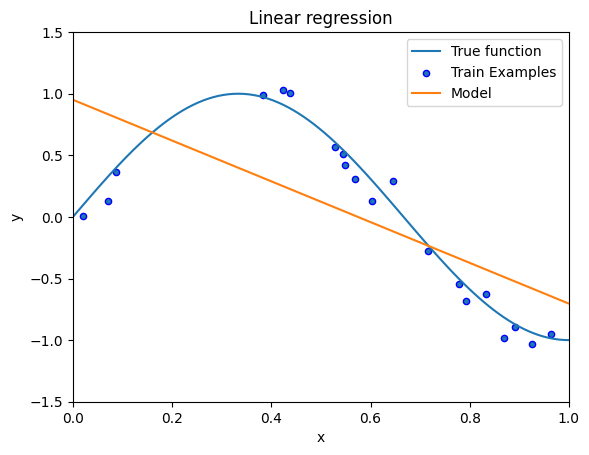

In [6]:
from sklearn.linear_model import LinearRegression

linear_regression = LinearRegression()
linear_regression.fit(X_train[:, np.newaxis], y_train)
plt.plot(x, true_fun(x), label="True function")
plt.scatter(X_train, y_train, edgecolor="b", s=20, label="Train Examples")
plt.plot(x, linear_regression.predict(x[:, np.newaxis]), label="Model")
plt.xlabel("x")
plt.ylabel("y")
plt.xlim((0, 1))
plt.ylim((-1.5, 1.5))
plt.legend(loc="best")
plt.title("Linear regression")
plt.show()

Task 1: Compute the **mean squared error** of the learned linear model on the test set.

In [7]:
from sklearn.metrics import mean_squared_error

X_test = X_test[:, np.newaxis]  # Ensure X_test is reshaped correctly

y_pred = linear_regression.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print("Mean Squared Error on the test set:", mse)



Mean Squared Error on the test set: 0.1736489094130998


## 1.1.3 Polynomial regression
The linear model we got in the previous part is too simple to explain the data. In
this part we will use more complex models. Let’s start with a quadratic function of
the form

h(x) = wo + w1 x + w2 x2 ,

To get the non-linear basis functions for the quadratic model, we will use Polyno-
mialFeatures from sklearn

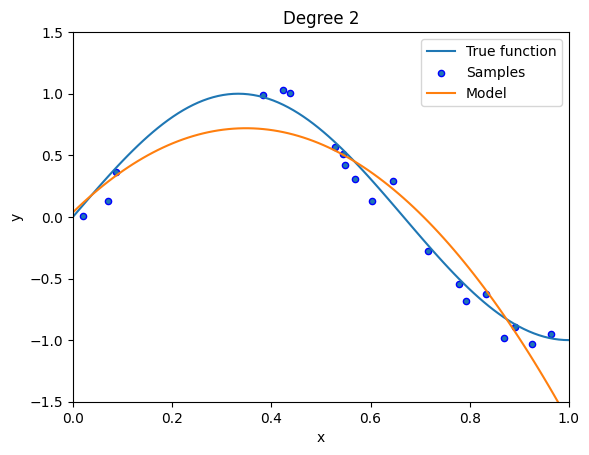

In [8]:
from sklearn.preprocessing import PolynomialFeatures

polynomial_features = PolynomialFeatures(2, include_bias=True)
q_model = LinearRegression()
q_model.fit(polynomial_features.fit_transform(X_train[:, np.newaxis]),
            y_train)
x = np.linspace(0, 1, 100)
plt.plot(x, true_fun(x), label="True function")
plt.scatter(X_train, y_train, edgecolor="b", s=20, label="Samples")
plt.plot(x, q_model.predict(polynomial_features.fit_transform(x[:,
                                                              np.newaxis])), label="Model")
plt.xlabel("x")
plt.ylabel("y")
plt.xlim((0, 1))
plt.ylim((-1.5, 1.5))
plt.legend(loc="best")
plt.title("Degree 2")
plt.show()

Task 2: Repeat the previous part with polynomials with degree 4 and 15.

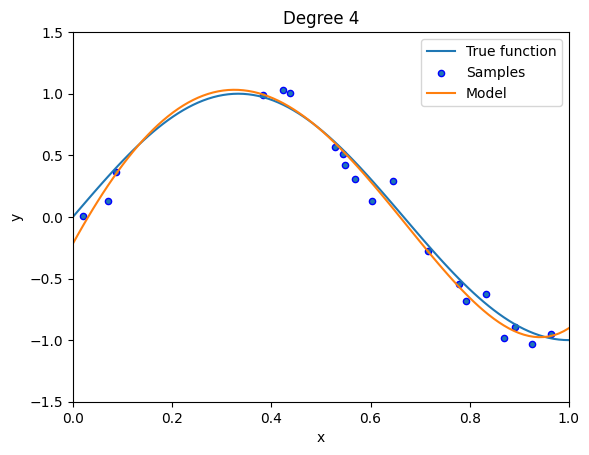

Degree 4 - Mean Squared Error on the test set: 0.004641799299812718


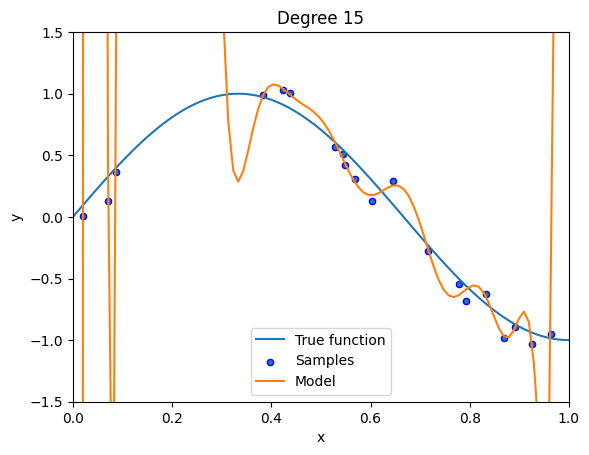

Degree 15 - Mean Squared Error on the test set: 503.6525031549251


In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

DEGREES = [4, 15]

for deg in DEGREES:
    # Create polynomial features
    polynomial_features = PolynomialFeatures(deg, include_bias=True)

    # Transform the training data
    X_train_poly = polynomial_features.fit_transform(X_train[:, np.newaxis])

    # Fit the model
    q_model = LinearRegression()
    q_model.fit(X_train_poly, y_train)

    # Generate x values for plotting
    x = np.linspace(0, 1, 100)

    # Transform x for plotting
    x_poly = polynomial_features.transform(
        x[:, np.newaxis])  # np.newaxis is used to increase the dimension of the existing array by one more dimension

    # Plot true function and training samples
    plt.plot(x, true_fun(x), label="True function")
    plt.scatter(X_train, y_train, edgecolor="b", s=20, label="Samples")

    # Plot model prediction
    plt.plot(x, q_model.predict(x_poly), label="Model")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-1.5, 1.5))
    plt.legend(loc="best")
    plt.title(f"Degree {deg}")
    plt.show()

    # Transform the test data
    X_test_poly = polynomial_features.transform(X_test)

    # calculate MSE for each degree
    y_pred = q_model.predict(X_test_poly)
    mse = mean_squared_error(y_test, y_pred)
    print(f"Degree {deg} - Mean Squared Error on the test set: {mse}")

From the above 2 figures we can see the huge difference in the Mean sqared error in the test dataset, which indicates that our model is overfitting the training data.

Task 3: Compute the mean squared error of the learned models on the test set. Which
model is the best?

MSE has been calculated in the previous part, and the results are as follows:
Mean Squared Error on the test set for each degree: 
- Degree 4 - Mean Squared Error on the test set: 0.004641799299812718
- Degree 15 - Mean Squared Error on the test set: 503.6525031549251

This clearly shows that the model with degree 4 is the best model as it has the lowest MSE.


# 1.2 Classification
Classifications is a supervised learning task where the goal is to predict a categorical
(discrete) target label. In this part we will experiment with random forests and SVM
classifiers on a toy dataset.

## 1.2.1 Generating examples
In this part, we will generate a toy dataset for classification. We are going to use the
make classification function from sklearn to generate the data and then split them
into training and testing sets using train test split.

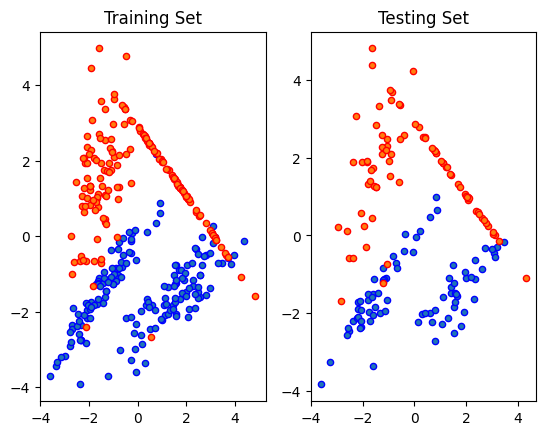

In [14]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

X, y = make_classification(n_samples=500, n_features=2, n_classes=2,
                           n_informative=2, n_redundant=0,
                           n_clusters_per_class=2, random_state=0,
                           shuffle=True, class_sep=1.5)

# make_classification is a function that generates a random n-class classification problem.

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.33, random_state=0)
colors = ["b", "r"]
fig, (ax1, ax2) = plt.subplots(1, 2)  # Create a figure and a set of subplots

ax1.set_title("Training Set")
ax2.set_title("Testing Set")

for c in np.unique(y_train):  # np.unique returns the sorted unique elements of an array 
    ax1.scatter([X_train[i, 0] for i in np.where(y_train == c)],
                [X_train[i, 1] for i in np.where(y_train == c)],
                edgecolor=colors[c], s=20,
                label="Samples")  # [X_train[i, 0] for i in np.where(y_train == c)] returns the x values of the samples where y_train == c
    # X_train is a 2D array, where the first column is the x values and the second column is the y values
    ax2.scatter([X_test[i, 0] for i in np.where(y_test == c)],
                [X_test[i, 1] for i in np.where(y_test == c)],
                edgecolor=colors[c], s=20, label="Samples")

## 1.2.2 Classification with random forests
A random forest is an ensemble model that fits a number of decision tree classifiers
on various sub-samples of the dataset. Each tree is trained on a bootstrap samples of
the training set to introduce randomness in the trees. Furthermore, when selecting
a feature for a test node during tree construction, only a subset of the features is
considered for the candidate tests. The final prediction in random forests is usually
obtained by averaging predictions from all trees.
Let’s start by testing a random forest of 2 trees on the dataset we generated in
the previous section. The following code trains a random forest on the training set
and prints both the training and testing accuracy.

In [16]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=2,
                             criterion="entropy",
                             max_features="sqrt", max_samples=.8,
                             random_state=0)
clf.fit(X_train, y_train)
print("Training Accuracy: ", clf.score(X_train, y_train))
print("Testing Accuracy: ", clf.score(X_test, y_test))

Training Accuracy:  0.9552238805970149
Testing Accuracy:  0.9212121212121213


For classification, accuracy is not the only used metrics. There are many other
metrics such as precision, recall, F1-score, ...etc. All of these metrics can be derived
form the the confusion matrix. The following code computes the confusion matrix
for the random forest trained in the previous part.

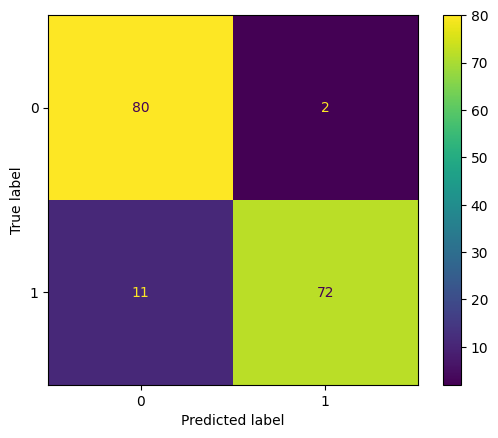

In [17]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf.classes_)
disp.plot()

Task 4: In the previous example, compute the precision, recall, F1-score. Discuss
when accuracy is not the most suitable metric.

In [18]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

Precision: 0.972972972972973
Recall: 0.8674698795180723
F1-score: 0.9171974522292994


Task 5: Train different random forests by changing the number of trees from 2 to 15.
Plot the training and testing accuracy of the trained models vs the number of trees.
What do you notice?

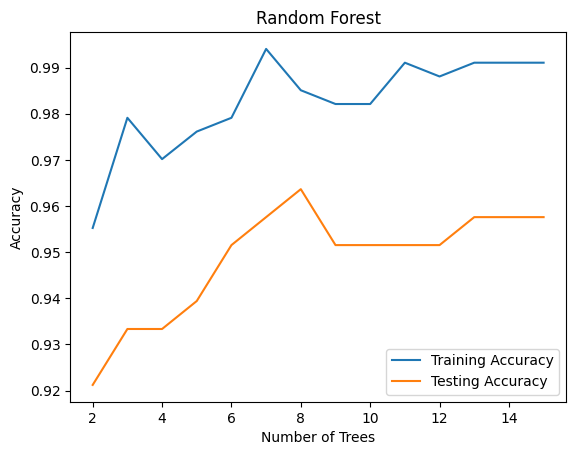

Maximum accuracy: 0.9636363636363636 with 8 trees
Maximum accuracy: 0.9940298507462687 with 7 trees


In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

n_trees = np.arange(2, 16)  # 2 to 15
train_acc = []
test_acc = []

for n in n_trees:
    clf = RandomForestClassifier(n_estimators=n,
                                 criterion="entropy",
                                 max_features="sqrt", max_samples=.8,
                                 random_state=0)
    clf.fit(X_train, y_train)
    train_acc.append(clf.score(X_train, y_train))
    test_acc.append(clf.score(X_test, y_test))

plt.plot(n_trees, train_acc, label="Training Accuracy")
plt.plot(n_trees, test_acc, label="Testing Accuracy")
plt.xlabel("Number of Trees")
plt.ylabel("Accuracy")
plt.legend(loc="best")
plt.title("Random Forest")
plt.show()

# print the maximum accuracy and the number of trees that achieved it
max_acc_test = max(test_acc)
max_idx = test_acc.index(max_acc_test)
print(f"Maximum accuracy: {max_acc_test} with {n_trees[max_idx]} trees")

max_acc_train = max(train_acc)
max_idx = train_acc.index(max_acc_train)
print(f"Maximum accuracy: {max_acc_train} with {n_trees[max_idx]} trees")


From the above figure we can see that the accuracy of training data is always higher than the accuracy of the testing data, and relatively when increasing the number  of trees the accuracy increases, in our case the maximum accuracy was achieved with 8 trees in the testing data set, and 7 trees in training dataset.

**Decision Surface**

Decision surface is a plot that shows how a machine learning model divides the feature
space to different class labels. The following code visualizes the decision surface of
our random forest model in the previous example. The result should be similar to
Figure 1.5

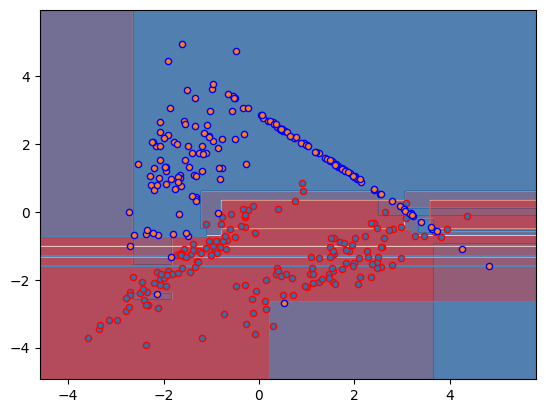

In [22]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap
from sklearn.ensemble import RandomForestClassifier

cmap = plt.cm.RdBu # colormap RdBu is used to show the decision surface
plot_step = 0.02  # fine step width for decision surface contours
clf = RandomForestClassifier(n_estimators=2, criterion="entropy",
                             max_features="sqrt", max_samples=.8,
                             random_state=0)
clf.fit(X_train, y_train)
# Now plot the decision boundary using a fine mesh as input to a
# filled contour plot
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1 # get the min and max values of the first column of the training data
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1 # get the min and max values of the second column of the training data
xx, yy = np.meshgrid(
    np.arange(x_min, x_max, plot_step),
    np.arange(y_min, y_max, plot_step)) # Return coordinate matrices from coordinate vectors.
estimator_alpha = 1.0 / len(clf.estimators_)
for tree in clf.estimators_:
    Z = tree.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, alpha=estimator_alpha, cmap=cmap)
colors = ["r", "b"]
for c in np.unique(y_train):
    plt.scatter([X_train[i, 0] for i in np.where(y_train == c)],
                [X_train[i, 1] for i in np.where(y_train == c)],
                edgecolor=colors[c], s=20, label="Samples")

Task 6: Draw the decision surface for a set of random forests with different number
of trees. Do you notice any pattern?

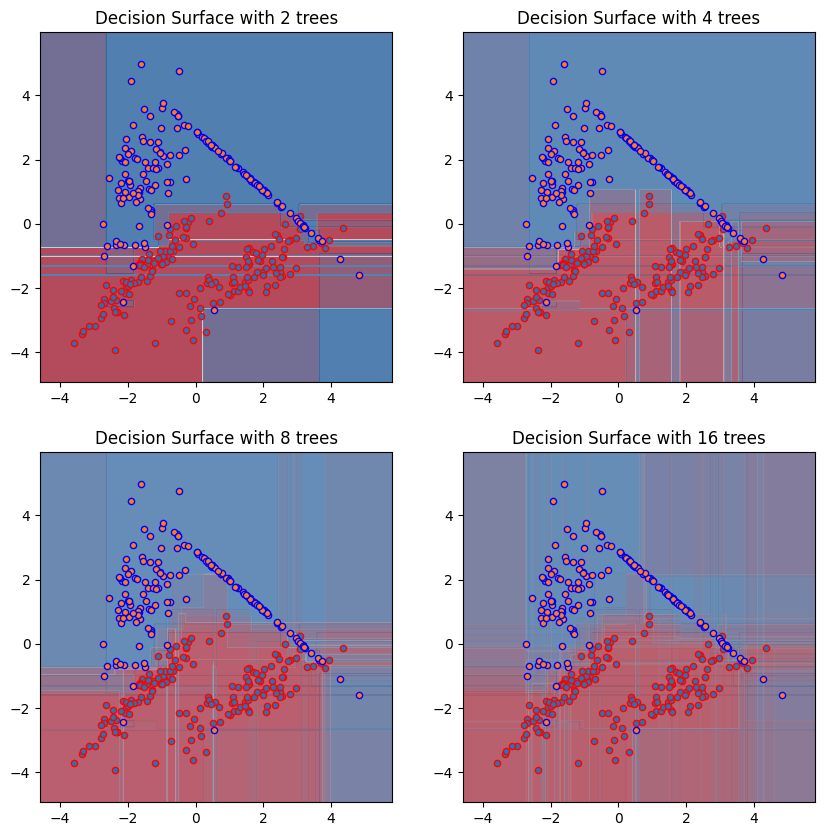

In [23]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap
from sklearn.ensemble import RandomForestClassifier

cmap = plt.cm.RdBu
plot_step = 0.02
n_trees = [2, 4, 8, 16]
fig, axs = plt.subplots(2, 2, figsize=(10, 100))

for i, n in enumerate(n_trees):
    clf = RandomForestClassifier(n_estimators=n, criterion="entropy",
                                 max_features="sqrt", max_samples=.8,
                                 random_state=0)
    clf.fit(X_train, y_train)
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, plot_step),
        np.arange(y_min, y_max, plot_step))
    estimator_alpha = 1.0 / len(clf.estimators_)
    for tree in clf.estimators_:
        Z = tree.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        cs = axs[i // 2, i % 2].contourf(xx, yy, Z, alpha=estimator_alpha, cmap=cmap)
    colors = ["r", "b"]
    for c in np.unique(y_train):
        axs[i // 2, i % 2].scatter([X_train[i, 0] for i in np.where(y_train == c)],
                                   [X_train[i, 1] for i in np.where(y_train == c)],
                                   edgecolor=colors[c], s=20, label="Samples")
    axs[i // 2, i % 2].set_title(f"Decision Surface with {n} trees")
plt.show()

From the above figures we can see that the decision surface is more complex when the number of trees is increased, and the decision surface is more smooth when the number of trees is increased as well.

## 1.2.3 Classification with SVM
In this section, we will test another popular classifier, which is support vector machine
(SVM). SVM tries to find a separating hyper-plane between the classes with rthe
maximum margin. The following code trains an SVM classifier with linear kernel on
our toy dataset


In [24]:
from sklearn import svm
clf = svm.SVC(kernel="linear", C=100)
clf.fit(X_train, y_train)
print("Training Accuracy: ",clf.score(X_train, y_train))
print("Testing Accuracy: ",clf.score(X_test, y_test))

Training Accuracy:  0.8895522388059701
Testing Accuracy:  0.896969696969697


Task 7: Draw the decision surface for the SVM model in the previous example.

Training Accuracy:  0.8895522388059701
Testing Accuracy:  0.896969696969697


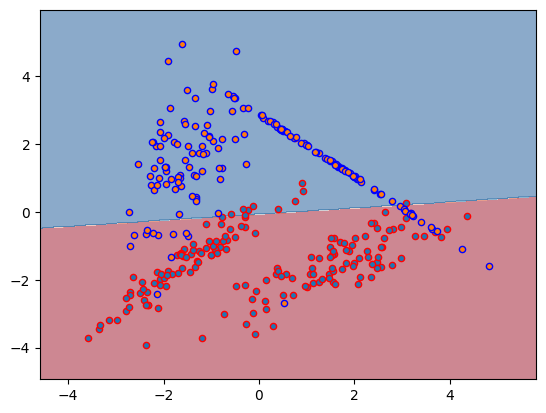

In [33]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap
from sklearn import svm

cmap = plt.cm.RdBu
plot_step = 0.02
clf = svm.SVC(kernel="linear", C=100)
clf.fit(X_train, y_train)
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1 # get the min and max values of the first column of the training data
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1 # get the min and max values of the second column of the training data
xx, yy = np.meshgrid(
    np.arange(x_min, x_max, plot_step),
    np.arange(y_min, y_max, plot_step))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]) # ravel() returns a contiguous flattened array 
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, alpha=0.5, cmap=cmap) # contourf() creates filled contour plots 
colors = ["r", "b"]
for c in np.unique(y_train): # np.unique returns the sorted unique elements of an array
    plt.scatter([X_train[i, 0] for i in np.where(y_train == c)], # [X_train[i, 0] for i in np.where(y_train == c)] returns the x values of the samples where y_train == c
                [X_train[i, 1] for i in np.where(y_train == c)],
                edgecolor=colors[c], s=20, label="Samples")
#mse for training and testing data
print("Training Accuracy: ",clf.score(X_train, y_train))
print("Testing Accuracy: ",clf.score(X_test, y_test))


Task 8: Train an SVM model with rbf kernel and draw its decision boundary. What
do you notice?

Training Accuracy:  0.9701492537313433
Testing Accuracy:  0.9636363636363636


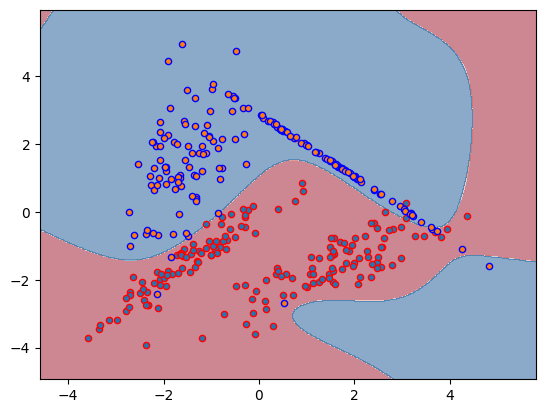

In [32]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap
from sklearn import svm

cmap = plt.cm.RdBu
plot_step = 0.02
clf = svm.SVC(kernel="rbf", C=100)
clf.fit(X_train, y_train)
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(
    np.arange(x_min, x_max, plot_step),
    np.arange(y_min, y_max, plot_step))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, alpha=0.5, cmap=cmap)
colors = ["r", "b"]
for c in np.unique(y_train):
    plt.scatter([X_train[i, 0] for i in np.where(y_train == c)],
                [X_train[i, 1] for i in np.where(y_train == c)],
                edgecolor=colors[c], s=20, label="Samples")
    
# MSE for training and testing data
print("Training Accuracy: ",clf.score(X_train, y_train))
print("Testing Accuracy: ",clf.score(X_test, y_test))


From the above figures we can see that the decision surface is more complex when using the rbf kernel and the accuracy is higher than the linear kernel. 

Task 9: Repeat task 8 but with C equal 0.5, 1, 100, and 1000. What do you notice?

Training Accuracy with C=0.5:  0.9522388059701492
Testing Accuracy with C=0.5:  0.9575757575757575
-----------------------------------
Training Accuracy with C=1:  0.9522388059701492
Testing Accuracy with C=1:  0.9575757575757575
-----------------------------------
Training Accuracy with C=100:  0.9701492537313433
Testing Accuracy with C=100:  0.9636363636363636
-----------------------------------
Training Accuracy with C=1000:  0.9701492537313433
Testing Accuracy with C=1000:  0.9636363636363636
-----------------------------------


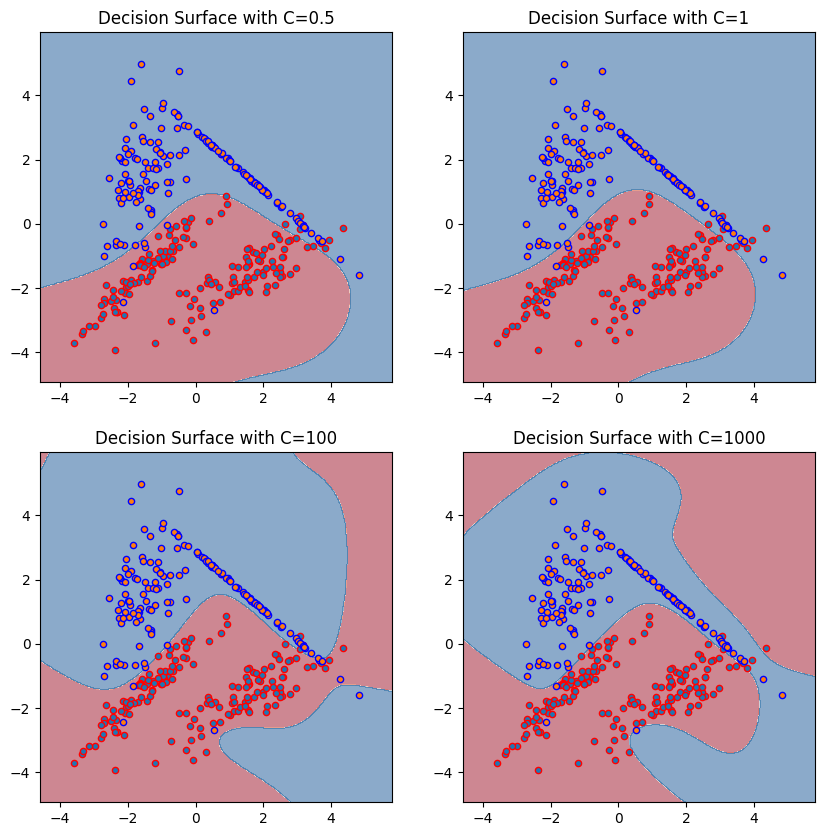

In [36]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap
from sklearn import svm

cmap = plt.cm.RdBu
plot_step = 0.02
C_values = [0.5, 1, 100, 1000]
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

for i, C in enumerate(C_values):
    clf = svm.SVC(kernel="rbf", C=C)
    clf.fit(X_train, y_train)
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, plot_step),
        np.arange(y_min, y_max, plot_step))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = axs[i // 2, i % 2].contourf(xx, yy, Z, alpha=0.5, cmap=cmap)
    colors = ["r", "b"]
    for c in np.unique(y_train):
        axs[i // 2, i % 2].scatter([X_train[i, 0] for i in np.where(y_train == c)],
                                   [X_train[i, 1] for i in np.where(y_train == c)],
                                   edgecolor=colors[c], s=20, label="Samples")
    axs[i // 2, i % 2].set_title(f"Decision Surface with C={C}")
    print(f"Training Accuracy with C={C}: ", clf.score(X_train, y_train))
    print(f"Testing Accuracy with C={C}: ", clf.score(X_test, y_test))
    print('-----------------------------------')
plt.show()


From the above figures we can see that the decision surface is more complex when using higher values of C, and the accuracy is higher as well; because the paraeter C stands for the regularization parameter, and the higher the value of C the less regularization is applied.

# 1.3 Hyper-parameters selection
Hyper-parameters are parameters that are set before starting the training process
and not directly learnt within estimators. Typical examples include number of trees
and max depth in random forests, C and kernel for SVM ...etc.
To select hyper-parameters, usually we search the hyper-parameter space for the
best cross-validation score (or if the dataset is large enough, we could search for the
parameters with the best score on a validation set).
The following code use grid search with cross-validation to find the best hyperparameters for the SVM example in the previous section.

In [37]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
parameters = {"kernel":("linear", "rbf"), "C":[1, 10, 100]}
svc = svm.SVC()
clf = GridSearchCV(svc, parameters, cv=5) # cv is the number of folds in cross-validation 
clf.fit(X_train, y_train)
print(clf.best_params_)

{'C': 10, 'kernel': 'rbf'}


Task 10: GridSearchCV has an attribute called cv results , which is a dict with
keys as column headers and values as columns. Print it and try to explain the values
that you get.

In [39]:
# print(clf.cv_results_)
clf.cv_results_


{'mean_fit_time': array([0.00788941, 0.00383124, 0.00591493, 0.00389371, 0.06955147,
        0.00520205]),
 'std_fit_time': array([0.00441484, 0.00096213, 0.00116435, 0.00033757, 0.03517616,
        0.00090335]),
 'mean_score_time': array([0.00495725, 0.00518637, 0.0018012 , 0.00241065, 0.00293393,
        0.00219831]),
 'std_score_time': array([0.00387425, 0.0041755 , 0.00016031, 0.00053861, 0.00233229,
        0.00013903]),
 'param_C': masked_array(data=[1, 1, 10, 10, 100, 100],
              mask=[False, False, False, False, False, False],
        fill_value=999999),
 'param_kernel': masked_array(data=['linear', 'rbf', 'linear', 'rbf', 'linear', 'rbf'],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 1, 'kernel': 'linear'},
  {'C': 1, 'kernel': 'rbf'},
  {'C': 10, 'kernel': 'linear'},
  {'C': 10, 'kernel': 'rbf'},
  {'C': 100, 'kernel': 'linear'},
  {'C': 100, 'kernel': 'rbf'}],
 'split0_test_score'

The cv_results_ attribute is a dictionary with keys as column headers and values as columns. The keys are as follows:
- mean_fit_time: the mean time taken to fit the model
- std_fit_time: the standard deviation of the time taken to fit the model
- mean_score_time: the mean time taken to score the model
- std_score_time: the standard deviation of the time taken to score the model
- param_C: the value of the C parameter
- param_kernel: the value of the kernel parameter
- params: the parameters used in the model
- split0_test_score: the score of the model on the first fold
- split4_test_score: the score of the model on the fifth fold
- mean_test_score: the mean score of the model
- std_test_score: the standard deviation of the score of the model
- rank_test_score: the rank of the model based on the score